In [29]:
import pandas as pd
import missingno as msngo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Carga de base

df = pd.read_csv('Dataset.csv', sep= ',')
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [5]:
# Tratamiento de datos nulos

df.fillna('S/I', inplace=True)
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [6]:
# Tratamiento de valores duplicados

df.drop('MOBILENO_AVL_FLAG', axis=1, inplace=True)
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [7]:
# Tratamiento valores que presenten inconsistencias

df = df[(df['PRI_CURRENT_BALANCE'] >= 0) & (df['SEC_CURRENT_BALANCE'] >= 0)]
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [8]:
meee =['ASSET_COST',
       'LTV',
       'PERFORM_CNS_SCORE',
       'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE',
       'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE',
       'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT',
       'NO_OF_INQUIRIES',
       'LOAN_DEFAULT']

df_final = df[meee]
df_final

,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NO_OF_INQUIRIES,LOAN_DEFAULT
0,58400,89.55,0,0,0,0,0,0,0,0,0
1,65550,73.23,598,1,27600,0,0,1991,0,0,1
2,61360,89.63,0,0,0,0,0,0,0,0,0
3,66113,88.48,305,0,0,0,0,31,0,1,1
4,60300,88.39,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
233149,105405,60.72,735,0,390443,0,0,4084,0,0,0
233150,100600,74.95,825,0,0,0,0,1565,0,0,0
233151,71212,48.45,0,0,0,0,0,0,0,0,0
233152,73286,49.10,0,0,0,0,0,0,0,0,0


In [9]:
columnas_a_normalizar = ['ASSET_COST',
                         'LTV',
                         'PERFORM_CNS_SCORE',
                         'PRI_CURRENT_BALANCE',
                         'SEC_CURRENT_BALANCE',
                         'PRIMARY_INSTAL_AMT',
                         'SEC_INSTAL_AMT',
                         'NO_OF_INQUIRIES']

df_final[columnas_a_normalizar] = (df_final[columnas_a_normalizar] - df_final[columnas_a_normalizar].mean()) / df_final[columnas_a_normalizar].std()

In [10]:
X = df_final.drop(["LOAN_DEFAULT"], axis=1)
Y = df_final["LOAN_DEFAULT"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [25]:
# Creacion de la funcion metrica

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

BDT2-4 - BDT2-23 https://alkemy-labs.atlassian.net/browse/BDT2-24

## HVIDAL Modeling I: regresion Logistica

Descripción

COMO DS DEVELOPER, QUIERO implementar un modelo de machine learning PARA predecir la clase a la cual pertenece un data point

Criterios de aceptación:
- Realizar el entrenamiento de una regresion logistica
- Procesar los datos de test utilizando el pipeline creado previamente
- Hacer predicciones sobre los datos normalizados

In [26]:
modeloRegresion = LogisticRegression()
modeloRegresion.fit(X_train,y_train)


LogisticRegression()

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    127474
           1       0.28      0.00      0.00     35377

    accuracy                           0.78    162851
   macro avg       0.53      0.50      0.44    162851
weighted avg       0.67      0.78      0.69    162851



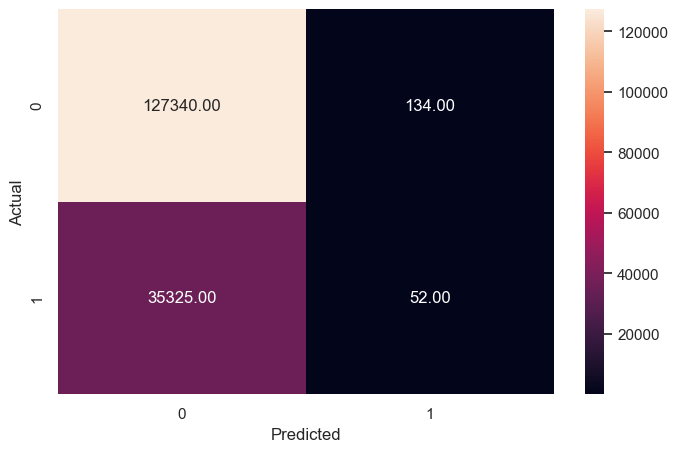

In [27]:
pred_train_dt = modeloRegresion.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54632
           1       0.34      0.00      0.00     15162

    accuracy                           0.78     69794
   macro avg       0.56      0.50      0.44     69794
weighted avg       0.69      0.78      0.69     69794



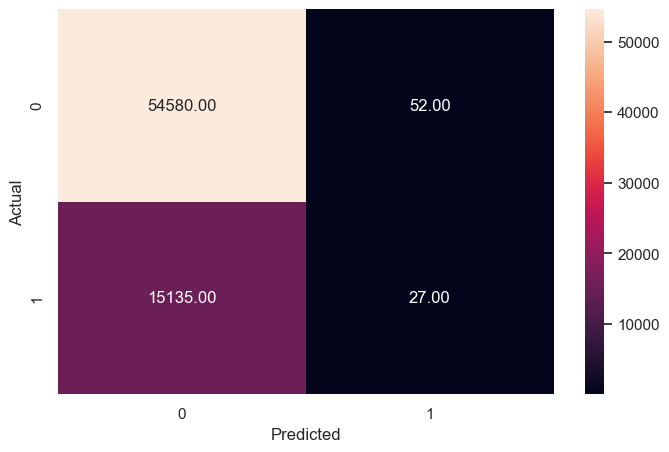

In [28]:
pred_test_dt = modeloRegresion.predict(X_test)
metrics_score(y_test, pred_test_dt)

- El modelo regresion logistica tiende a dar solo respuestas valor 0 por lo que no resulta un buen modelo para predecir la variable

BDT2-5 - BDT2-26 https://alkemy-labs.atlassian.net/browse/BDT2-26

# Modeling III: Arboles de desicion
COMO DS DEVELOPER, QUIERO implementar un modelo de machin learning PARA predecir la clase a la cual pertenece un data point

Criterios de aceptación:

- Realizar el entrenamiento del modelo Desition Tree classifier
- Procesar los datos de test utilizando el pipeline creado previamente
- Hacer predicciones sobre los datos normalizados

In [30]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    127474
           1       0.99      0.93      0.96     35377

    accuracy                           0.98    162851
   macro avg       0.99      0.96      0.97    162851
weighted avg       0.98      0.98      0.98    162851



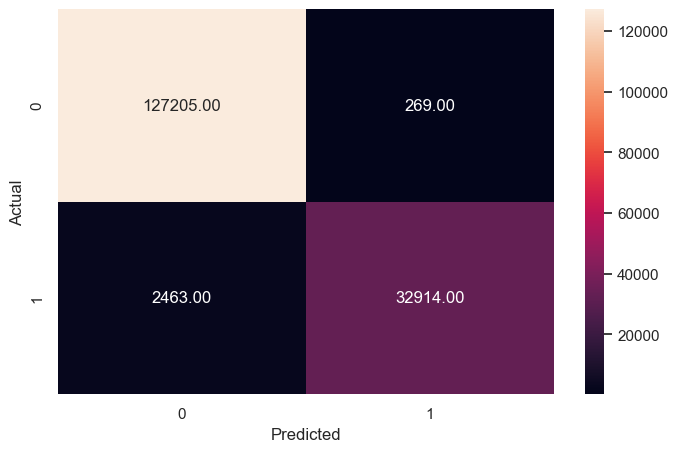

In [31]:
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     54632
           1       0.24      0.24      0.24     15162

    accuracy                           0.67     69794
   macro avg       0.52      0.52      0.52     69794
weighted avg       0.67      0.67      0.67     69794



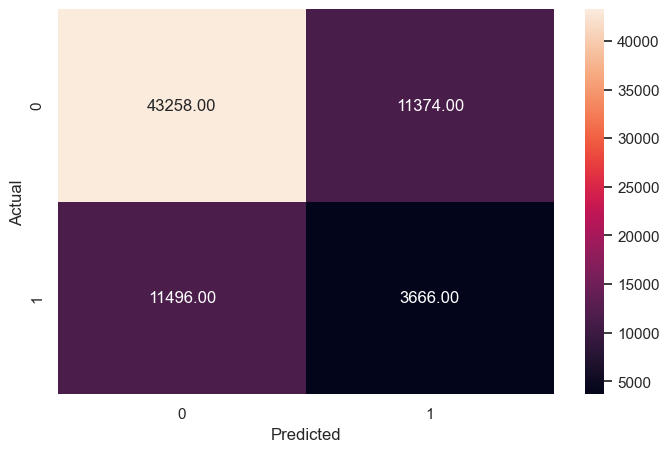

In [32]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

- El modelo decisionTree presenta sobre-ajuste en el apartado de train y es resforzado en la parte del test al ver una clara diferencia en los resultados dando una respuesta del 0.67
- Tiende a predecir menos valores 1 para la variable respuesta.